In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from PIL import Image, ImageDraw
import xml.etree.ElementTree as ET
from string import digits

A futtatás előtt az adatkészletet fel kell tölteni driveba, majd onnan másoljuk be a temporális fájlok közé a zip fájlt.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
!unzip drive/MyDrive/Halado_adatelemzes/data_v4.zip -d sample_data/train
!unzip drive/MyDrive/Halado_adatelemzes/data_v3.zip -d sample_data/test

#Annotációk
Annotációk belovasása az xml fájlokból.
Vizsgált adatok: Összesítetve a generált képeken az egyes annotációk típusainak eloszlása, az egyes képeknél az annotációk eloszlása.

In [9]:
train_path = 'sample_data/train/'
test_path = 'sample_data/test/'
annot_train_path = f"{train_path}annotations/annotation_"   #train annotációk  elérési útvonala
annot_test_path = f"{train_path}annotations/annotation_"   #train annotációk  elérési útvonala
annotations_train = []                       #annotációk képenként külön, az elemek dictionary-ik
annotations_test = []                       #annotációk képenként külön, az elemek dictionary-ik
labels_train = dict()                        #annotáció szövegek
labels_test = dict()                        #annotáció szövegek

In [20]:
remove_digits = str.maketrans('', '', digits)
key=''

#train adatok betöltése
for image_id in range(0,4000):
  p_temp = f"{annot_train_path}{image_id:04}.xml"  #fájl pontos neve
  tree = ET.parse(p_temp)
  root = tree.getroot()
  parsed_dict = dict()                          #dict-ben tárolva, hogy melyik annotációból a képen mennyi van

  for child in root.iter():
      if len(child)>1 and child[0].tag == 'name':
          key = child[0].text.translate(remove_digits).strip().strip('_')   #annotációk típus szerint csoportosítása
          if key in parsed_dict:      #kép listájához tartozó annot. lista növelés
              parsed_dict[key] += 1
          else:
              parsed_dict[key] = 1
          if key in labels_train:           #összes képhez tartozó annot. lista növelés
              labels_train[key] += 1
          else:
              labels_train[key] = 1
  annotations_train.append(parsed_dict)

#test adatok betöltése
for image_id in range(0,1980):
  p_temp = f"{annot_test_path}{image_id:04}.xml"   #fájl pontos neve
  tree = ET.parse(p_temp)
  root = tree.getroot()
  parsed_dict = dict()                          #dict-ben tárolva, hogy melyik annotációból a képen mennyi van

  for child in root.iter():
      if len(child)>1 and child[0].tag == 'name':
          key = child[0].text.translate(remove_digits).strip().strip('_')   #annotációk típus szerint csoportosítása
          if key in parsed_dict:      #kép listájához tartozó annot. lista növelés
              parsed_dict[key] += 1
          else:
              parsed_dict[key] = 1
          if key in labels_test:           #összes képhez tartozó annot. lista növelés
              labels_test[key] += 1
          else:
              labels_test[key] = 1
  annotations_test.append(parsed_dict)

##Összes kép vizsgálata

In [21]:
labels_train, labels_test

({'SKY': 3747,
  'BUILDINGS': 30395,
  'POLE': 53873,
  'NATURE': 40554,
  'GUARD_RAIL': 11840,
  'OBSTACLES': 9234,
  '': 4796,
  'CAR': 3811,
  'WATER': 2022,
  'SIDEWALK': 2619,
  'STREET': 3331,
  'ROCK': 2405,
  'SAND': 934,
  'TRAFFIC_SIGNS': 656,
  'ROADBLOCK': 4746,
  'SOLID_LINE': 3,
  'RESTRICTED_STREET': 18},
 {'SKY': 1885,
  'BUILDINGS': 15910,
  'POLE': 26905,
  'NATURE': 21169,
  'GUARD_RAIL': 5036,
  'OBSTACLES': 4499,
  '': 2871,
  'CAR': 1885,
  'WATER': 996,
  'SIDEWALK': 1359,
  'STREET': 1702,
  'ROCK': 1331,
  'SAND': 502,
  'TRAFFIC_SIGNS': 318,
  'ROADBLOCK': 2157,
  'SOLID_LINE': 1,
  'RESTRICTED_STREET': 5})

In [22]:
np.random.seed(137)
colors = dict()         #kirajzoláshoz külön színek használata, egységes az összes plot-on
for l in labels_train:
    colors[l] = tuple(np.random.rand(3))

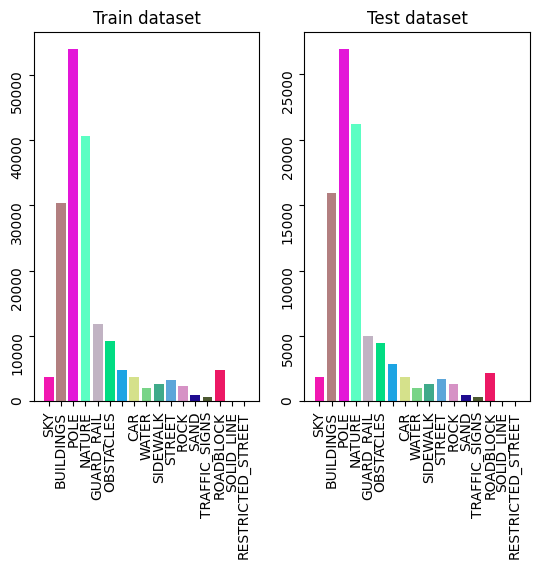

In [23]:
names = list(labels_train.keys())
values_train = list(labels_train.values())
#ugyanabban a sorrendben legyenek az adatok a 2 diagrammon, ezért átrendezzük a test adatok sorrendjét
values_test = list([labels_test.get(key) for key in labels_train.keys()])

figure, axis = plt.subplots(1,2)
axis[0].bar(range(len(labels_train)), values_train, tick_label=names, color=[colors.get(n) for n in names])
axis[0].tick_params(labelrotation=90)
axis[0].set_title("Train dataset")
axis[1].bar(range(len(labels_train)), values_test, tick_label=names, color=[colors.get(n) for n in names])
axis[1].tick_params(labelrotation=90)
axis[1].set_title("Test dataset")
plt.show()

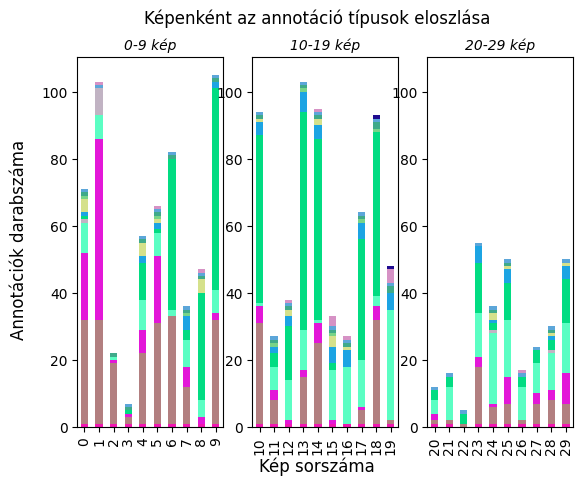

In [47]:
df = pd.DataFrame(annotations_train[0:30])
figure, axis = plt.subplots(1,3)
figure.suptitle('Képenként az annotáció típusok eloszlása')
figure.supxlabel('Kép sorszáma')
figure.supylabel('Annotációk darabszáma')
df[0:10].plot(ax=axis[0], kind='bar', stacked=True, color=[colors.get(n) for n in names], legend=False)
df[10:20].plot(ax=axis[1], kind='bar', stacked=True, color=[colors.get(n) for n in names], legend=False)
df[20:30].plot(ax=axis[2], kind='bar', stacked=True, color=[colors.get(n) for n in names], legend=False)
ylim = max(axis[0].get_ylim(),axis[1].get_ylim(), axis[2].get_ylim())
axis[0].set_title(label='0-9 kép', fontstyle='oblique', fontsize='medium')
axis[1].set_title(label='10-19 kép', fontstyle='oblique', fontsize='medium')
axis[2].set_title(label='20-29 kép', fontstyle='oblique', fontsize='medium')
axis[0].set_ylim(ylim)
axis[1].set_ylim(ylim)
axis[2].set_ylim(ylim)
plt.show()

##Egy kép vizsgálata


In [59]:
img_id = 10
if not 0<=img_id< 4000:
  img_id=0

In [60]:
print(f"A képen {sum(annotations_train[img_id].values())} kijelölés található a képen, amik {len(annotations_train[img_id])} típusba tartoznak.")

A képen 94 kijelölés található a képen, amik 9 típusba tartoznak.


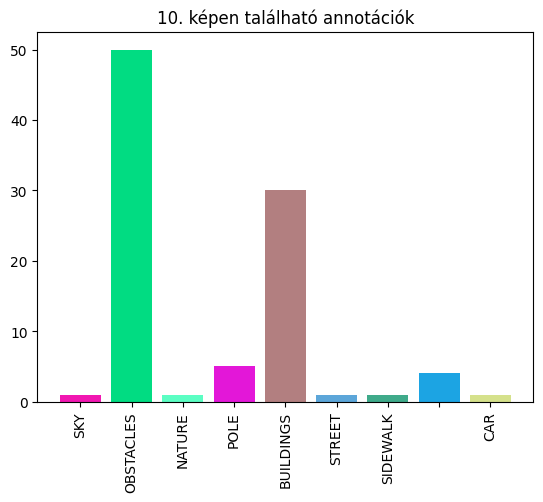

In [62]:
i_names = list(annotations_train[img_id].keys())
i_values = list(annotations_train[img_id].values())

plt.bar(range(len(annotations_train[img_id])), i_values,  tick_label=i_names, color=[colors.get(n) for n in i_names])
plt.title(f"{img_id}. képen található annotációk")
plt.xticks(rotation=90)
plt.show()

#Kép és területek vizualizációja
Kijelölések a képeken. Bekeretezve a körvonala.

In [66]:
img_id = 10              #Kép és a hozzá tartozó xml kiválasztása
path = train_path         #train_path vagy test_path

if path == train_path and not 0<=img_id< 4000:
  img_id=0
if path == test_path and not 0<=img_id< 1980:
  img_id=0
xml_example = f"{path}annotations/annotation_{image_id:04}.xml"
img_example = f"{path}images/image_{image_id:04}.webp"

In [67]:
root_example = ET.parse(xml_example).getroot()
items = []        #tárgyak neve és koordinátája a képen
for child in root_example.iter():
    if len(child)==5 and child[0].tag == 'name':
        key = child[0].text.translate(remove_digits).strip().strip('_')   #annotációk típus szerint csoportosításhoz
        items.append([[key],[child[4][0].text.strip(), child[4][1].text.strip(), child[4][2].text.strip(), child[4][3].text.strip()]])

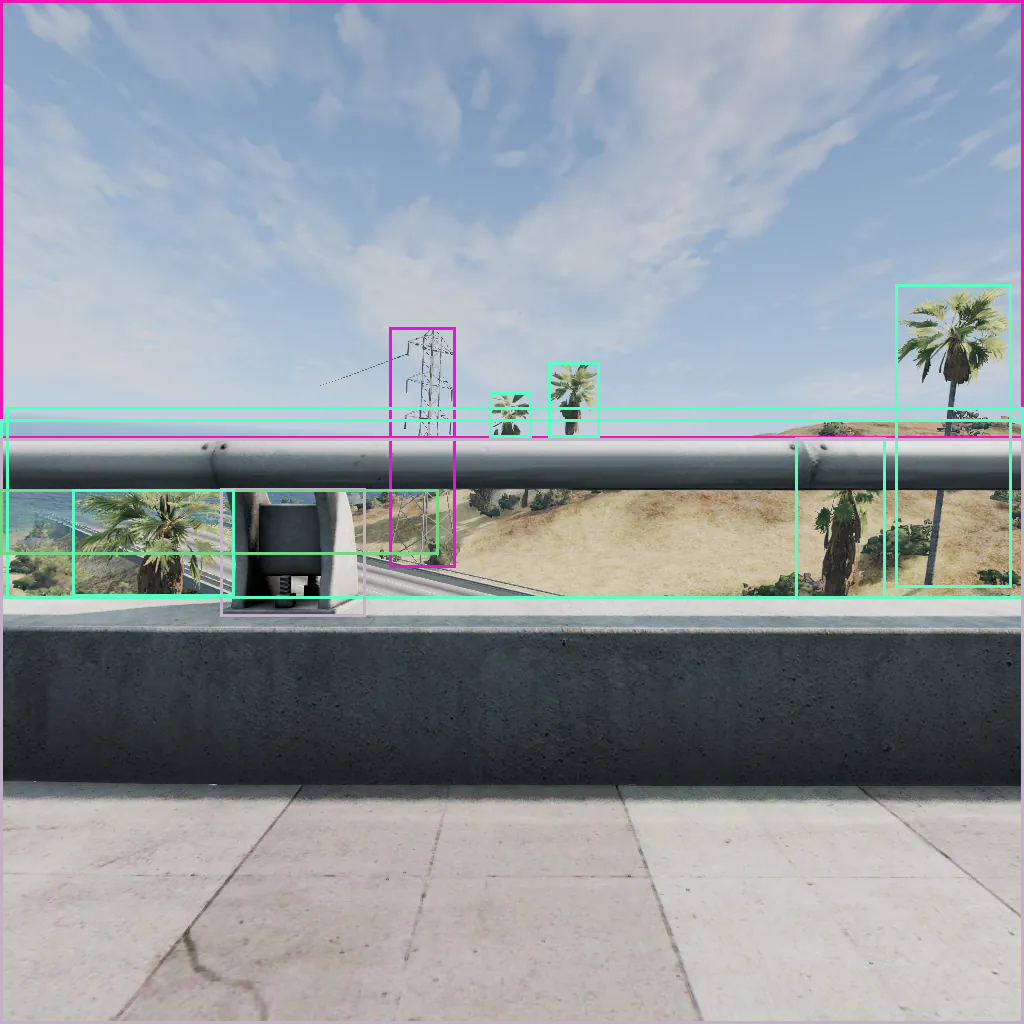

In [68]:
img = Image.open(img_example)
img1 = ImageDraw.Draw(img)
for s in items:
    shape = [(int(s[1][0]),int(s[1][1])), (int(s[1][2]), int(s[1][3]))]   #annotáció helye
    color = tuple([int(255*x) for x in colors[s[0][0]]]) if s[0][0] in colors.keys() else (150, 0, 0)  #annotáció színe típus szerint
    img1.rectangle(shape, fill=None, outline=color, width=3)
img